In [13]:
from scripts.figures_import_helper import *

bids close and far from reserve price, using national data

In [14]:
print('='*20 + '\n' + 'National sample (high/low bids)')
print('collecting and processing data')
national_data = rebidding.RefinedMultistageData(
    os.path.join(path_data, 'sample_with_firm_rank.csv'))

National sample (high/low bids)
collecting and processing data


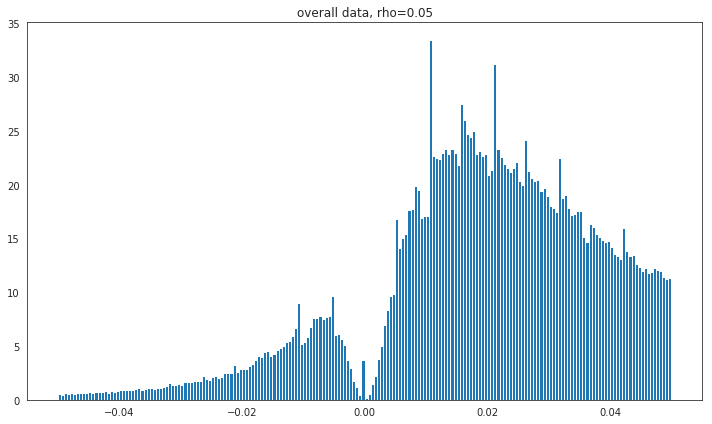

In [15]:
plot_delta(national_data)

In [16]:
solver = ComputeMinimizationSolution(
    constraint_func=round2_constraints,
    solver_cls=rebidding.ParallelRefinedMultistageSolver,
    metric=rebidding.RefinedMultistageIsNonCompetitive)

In [17]:
def get_demands(data):
    deviations = [-.025, 0, .001]
    ties, filtered_data = solver._apply_filter(data)
    demands = filtered_data.assemble_target_moments(deviations)
    del filtered_data
    return demands
get_demands(national_data)

[0.4137272006025878,
 0.027552602673381114,
 0.08434489318917965,
 0.10554918569041385,
 0.10536723201635442]

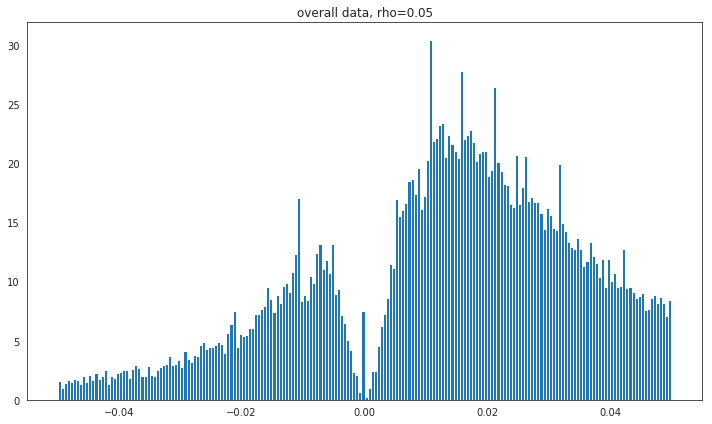

In [18]:
national_data_above = rebidding.RefinedMultistageData.from_clean_bids(
    national_data.df_bids.loc[national_data.data.norm_bid.between(0.8, .95)])
plot_delta(national_data_above)

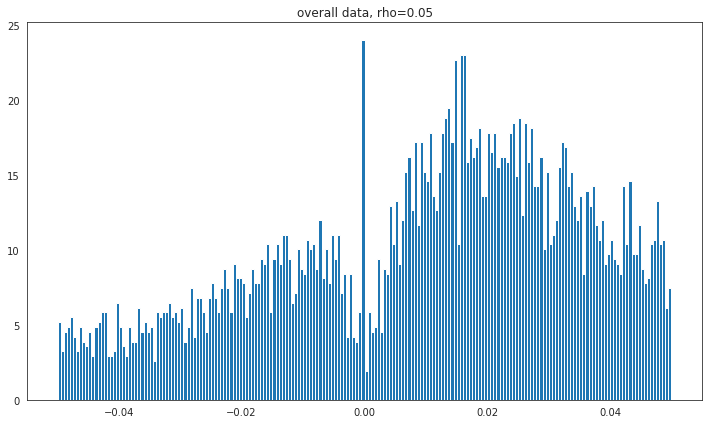

In [19]:
national_data_below = rebidding.RefinedMultistageData.from_clean_bids(
    national_data.df_bids.loc[national_data.data.norm_bid < 0.8])
plot_delta(national_data_below)

In [20]:
for data in [national_data, national_data_above, national_data_below]:
    print(get_demands(data))
    del data          

[0.4137272006025878, 0.027552602673381114, 0.08434489318917965, 0.10554918569041385, 0.10536723201635442]
[0.5234357428815618, 0.0, 0.0, 0.18215554855831947, 0.1789243248916678]
[0.38565333862486356, 0.0, 0.0, 0.23613453715646393, 0.23484472665939082]


In [17]:
print(national_data_above.df_bids.shape, national_data_below.df_bids.shape)

(663917, 7) (87003, 7)


In [ ]:
print('computing problem solutions')
deviations = [-.025, .0, .001]

In [ ]:
solutions_above, _ = compute_solution_rebidding(
    national_data_above, deviations)
solutions_below, _ = compute_solution_rebidding(
     national_data_below, deviations)

In [ ]:
print('saving plot\n')
pretty_plot('R2/high vs low normalized bids (national auctions)',
            [1 - solutions_above, 1 - solutions_below],
            ["normalized bid above .8", "normalized bid below .8"],
            xlabel='m',
            xticks=(.05, .1, .15, .2))

In [ ]:
print('saving data\n')
save2frame([1 - solutions_above, 1 - solutions_below],
           ['min_m={}'.format(m) for m in [.05, .1, .15, .2]],
           'R2/high vs low normalized bids (national auctions)')